In [2]:
from   network_class  import Network as Net
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from   utils import *
import time
import numpy as np

# markers color 
colors_c = np.array(['tab:blue','tab:green','k','w','c'])
colors_s = np.array(['tab:green', 'tab:blue'])

# layout for subplots
layout = [[0,1],
          [2,2]]

Npoints2D = 200
xy        = np.linspace(-1,1,Npoints2D)
X1,X2     = np.meshgrid(xy,xy)

## Get Train data

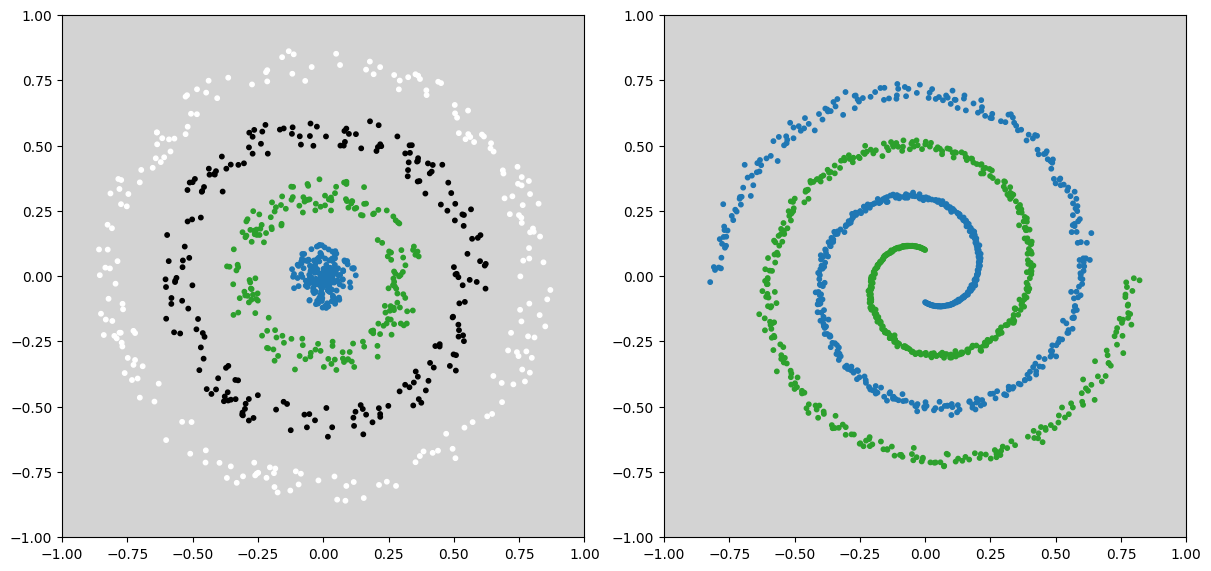

In [3]:
Nrings              = 4
train_data_c, Mxy_c = get_circles(Npts=200,k=0.5,Nrings=Nrings)
train_data_s, Mxy_s = get_double_spiral(a=0.4,n_turns=2,pts_turn=300,knoise=0.01)
size   = 600
fig,ax = plt.subplots(1,2,figsize=(2*px2inch*size, px2inch*size),constrained_layout=True)

markers_size = 10
ax[0].scatter(Mxy_c[:,0],Mxy_c[:,1],c=colors_c[Mxy_c[:,2].astype(int)],s=markers_size)
ax[0].set_aspect(1);ax[0].set_xlim(-1,1);ax[0].set_ylim(-1,1)
ax[0].set_facecolor("lightgray")

ax[1].scatter(Mxy_s[:,0],Mxy_s[:,1],c=colors_c[Mxy_s[:,2].astype(int)],s=markers_size)
ax[1].set_aspect(1);ax[1].set_xlim(-1,1);ax[1].set_ylim(-1,1)
ax[1].set_facecolor("lightgray")

plt.show()

## Animation

In [10]:

Nframes = 20
data    = {'circles':[],
           'spirals':[]}

mini_batch_size = 1
eta             = 1.2

for i in range(Nframes):

    epochs = 100
    ## circles
    layers = [2,100,Nrings]
    net    = Net(layers,X1,X2)
    train_results_c = net.SGD(train_data_c, epochs, mini_batch_size, eta,eval_2D_train=False,test_data=train_data_c)

    epochs = 200
    ## spirals
    layers = [2,100,2]
    net    = Net(layers,X1,X2)
    train_results_s = net.SGD(train_data_s, epochs, mini_batch_size, eta,eval_2D_train=False,test_data=train_data_s)

    data['circles'].append( train_results_c['Zcd_end'] )
    data['spirals'].append( train_results_s['Zcd_end'] )
    
np.save(f'data/animation_data_final{random_str(length=3)}.npy',data) # save

Neural Network Train Start
Neural Network Train End: Lapse Time: 6.378 s
Neural Network Train Start


c:\Users\Genio\Documents\INGENIERIA\VARIOS_Archivos\GitHub\NeuralNetworks\PythonScripts\Geometric_Classification\network_class.py:19: RuntimeWarning: divide by zero encountered in log
  def fn(a, y): return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))
c:\Users\Genio\Documents\INGENIERIA\VARIOS_Archivos\GitHub\NeuralNetworks\PythonScripts\Geometric_Classification\network_class.py:19: RuntimeWarning: invalid value encountered in multiply
  def fn(a, y): return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))


Neural Network Train End: Lapse Time: 18.803 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 6.587 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 19.699 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 6.792 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 19.865 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 6.807 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 20.039 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 6.948 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 20.118 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 6.910 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 20.256 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 7.026 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 21.584 s
Neural Network Train Start
Neural Network Train End: Lapse Time: 7.303 

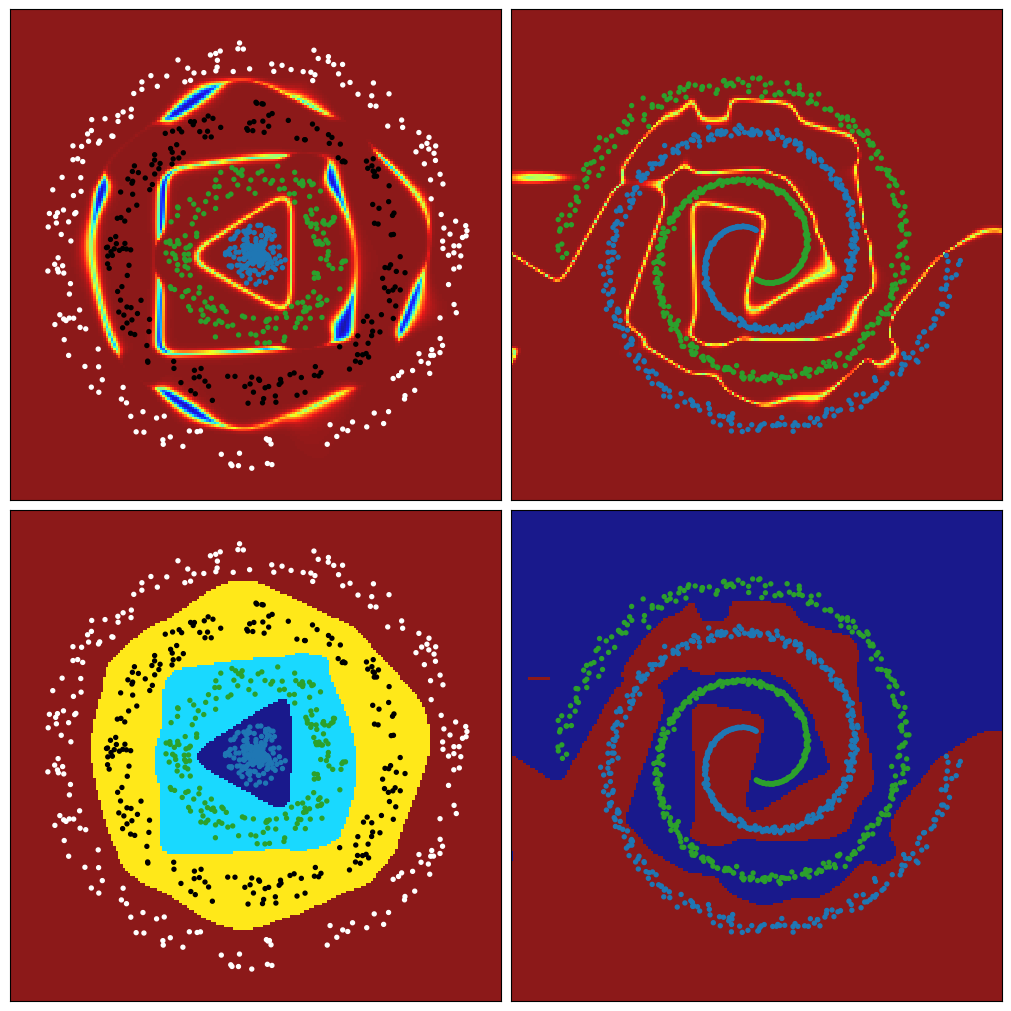

Lapse Time Write animation = 8.980 s


In [11]:

## layouts
layout   = [[0,2],
            [1,3]]

size     = 1000
fig, ax  = plt.subplot_mosaic(layout,figsize=(px2inch*size, px2inch*size),constrained_layout=True)

cmap_c   = colors_c[Mxy_c[:,2].astype(int)]
cmap_s   = colors_s[Mxy_s[:,2].astype(int)]

ind_c     = [0,1]
ind_s     = [2,3]
Zc_c,Zd_c = data['circles'][0]
Zc_s,Zd_s = data['spirals'][0]

mesh_con_c,mesh_dis_c = subplot_check_square(ax,ind_c,cmap_c,Mxy_c,X1,X2,Zc_c,Zd_c,alphaMesh=0.9,sizeMarkers=8,cmap_con='jet',cmap_dis='jet')
mesh_con_s,mesh_dis_s = subplot_check_square(ax,ind_s,cmap_s,Mxy_s,X1,X2,Zc_s,Zd_s,alphaMesh=0.9,sizeMarkers=8,cmap_con='jet',cmap_dis='jet')

# Run animation and save
run_animation   = True
save_animation  = True

if run_animation:

    def animate_fun(i):
        
        mesh_con_c.set_array(data['circles'][i][0].ravel())
        mesh_dis_c.set_array(data['circles'][i][1].ravel())
        
        mesh_con_s.set_array(data['spirals'][i][0].ravel())
        mesh_dis_s.set_array(data['spirals'][i][1].ravel())
        
        return mesh_con_c, mesh_dis_c, mesh_con_s, mesh_dis_s
    

    ani = animation.FuncAnimation(fig=fig,func=animate_fun,interval=100,frames=Nframes )
    plt.show()

if save_animation:
    
    writer = animation.PillowWriter(fps=2,
                                    metadata=dict(artist='Me'),
                                    bitrate=-1)
    
    t_start = time.time()
    
    ani.save('imgs/animation_final_6.gif', writer=writer)
    
    t_end = time.time() - t_start 
    
    print(f'Lapse Time Write animation = {t_end:0.3f} s' )